In [31]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [32]:
# Load the dataset
column_names = [
    'Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
    'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution',
    'Heating Load', 'Cooling Load'
]
df = pd.read_csv('energyefficiency.csv', names=column_names, skiprows=1)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [33]:
# Separate features (X) and targets (y1, y2)
X = df.drop(columns=['Heating Load', 'Cooling Load'])
y1 = df['Heating Load']
y2 = df['Cooling Load']

In [34]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Split the dataset into training and testing sets for Heating Load
X_train, X_test, y1_train, y1_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=42)
# Split the dataset into training and testing sets for Cooling Load
X_train,X_test,y2_train,y2_test = train_test_split(X_scaled,y2,test_size=0.2, random_state=42)

In [36]:
# Train a Linear Regression model for Heating Load
model1 = RandomForestRegressor()
model1.fit(X_train, y1_train)

RandomForestRegressor()

In [37]:
y1_pred = model1.predict(X_test)

In [38]:
# Train a Linear Regression model for Cooling Load
model2 = RandomForestRegressor()
model2.fit(X_train, y2_train)

RandomForestRegressor()

In [39]:
y2_pred = model2.predict(X_test)

In [40]:
# Evaluate the model for Heating Load
rsme1 = np.sqrt(mean_squared_error(y1_test,y1_pred))
r2_1 = r2_score(y1_test,y1_pred)
# Evaluate the model for Cooling Load
rsme2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2_2 = r2_score(y2_test, y2_pred)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE) for Heating Load: {rsme1}")
print(f"R^2 Score: {r2_1}")
print(f"Root Mean Squared Error (RMSE) for Cooing Load: {rsme2}")
print(f"R^2 Score: {r2_2}")


Root Mean Squared Error (RMSE) for Heating Load: 0.4953480725580865
R^2 Score: 0.9976459170609788
Root Mean Squared Error (RMSE) for Cooing Load: 1.7841175378408136
R^2 Score: 0.9656467697850243


In [41]:
# Visualization: Actual vs Predicted
plt.figure(figsize =(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

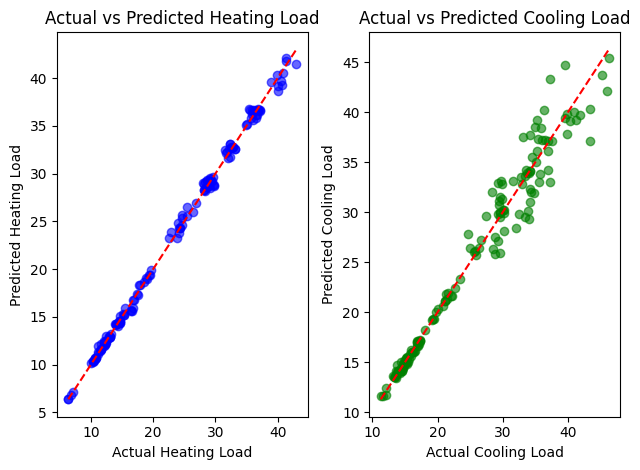

In [42]:
# Heating Load
plt.subplot(1,2,1)
plt.scatter(y1_test, y1_pred, alpha=0.6, color="blue")
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--')
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")

# Cooling Load
plt.subplot(1,2,2)
plt.scatter(y2_test, y2_pred, alpha=0.6, color="green")
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--')
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Actual vs Predicted Cooling Load")

plt.tight_layout()
plt.show()

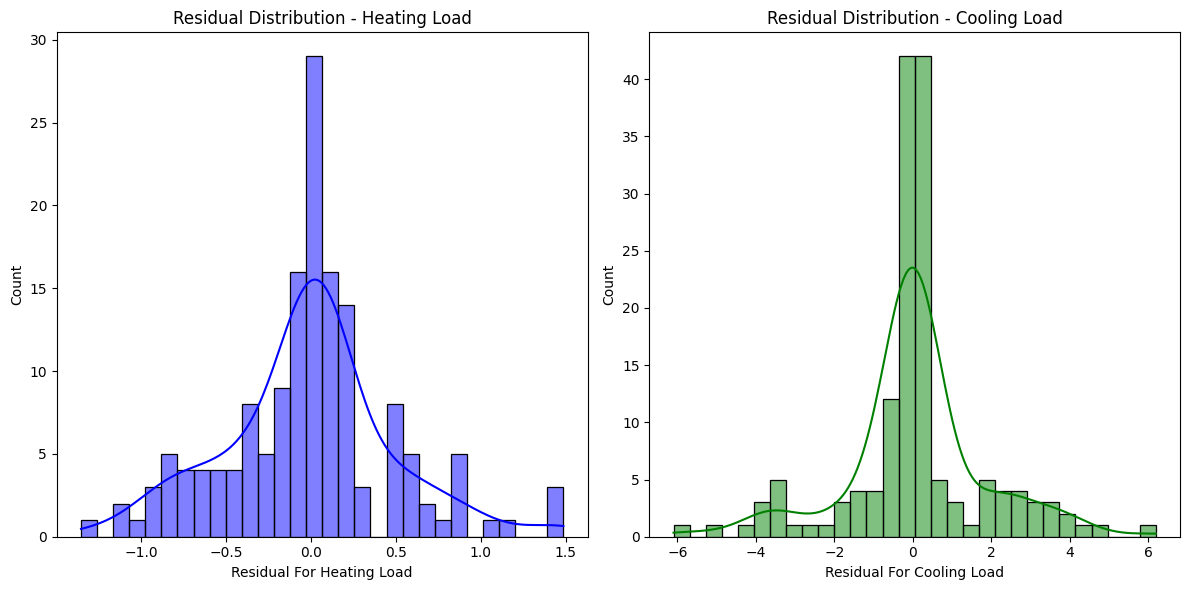

In [43]:
# Residual Analysis
plt.figure(figsize=(12,6))

# Heating Load Residuals
plt.subplot(1,2,1)
sns.histplot(y1_test - y1_pred, kde = True, color="blue", bins=30)
plt.xlabel("Residual For Heating Load")
plt.title("Residual Distribution - Heating Load")

# Cooling Load Residuals
plt.subplot(1,2,2)
sns.histplot(y2_test - y2_pred, kde = True, color="green", bins=30)
plt.xlabel("Residual For Cooling Load")
plt.title("Residual Distribution - Cooling Load")

plt.tight_layout()
plt.show()

In [44]:
# Save the model and scaler with pickle
models = {
    "heating_load_model":model1,
    "cooling_load_model":model2,
    "scaler":scaler
}

with open('energyefficiency.pkl', 'wb') as model_file:
    pickle.dump(models, model_file)

print("Both models and scaler saved successfully in one file!")

Both models and scaler saved successfully in one file!
